In [1]:
#imports

import numpy as np
import pandas as pd
import scipy as sp
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import covariance
import seaborn as sb

#models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model algorithms
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts
from sklearn.cross_validation import train_test_split as tts_cv

#geature selection
from sklearn.feature_selection import RFE


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data
rawData = pd.read_csv('ENB2012_data.csv', header=1)
rawData.head()

,COMPACT,S_AREA,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
0,0.74,686.0,245.0,220.5,3.5,4.0,0.0,0.0,6.01,10.94
1,0.74,686.0,245.0,220.5,3.5,5.0,0.0,0.0,6.04,11.17
2,0.74,686.0,245.0,220.5,3.5,3.0,0.0,0.0,6.05,11.19
3,0.74,686.0,245.0,220.5,3.5,2.0,0.0,0.0,6.07,10.90
4,0.71,710.5,269.5,220.5,3.5,4.0,0.0,0.0,6.37,11.29


In [3]:
WD = rawData
WD.describe()
    ##WD.info()

,COMPACT,S_AREA,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


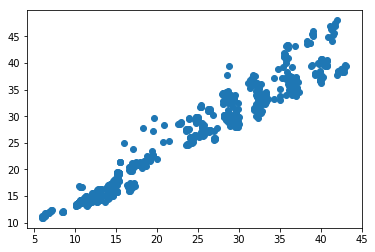

In [4]:
x = WD['H_LOAD']
y = WD['C_LOAD']
plt.scatter(x,y)
plt.show()

              COMPACT        S_AREA        W_AREA        R_AREA        HEIGHT  \
COMPACT  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
S_AREA  -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
W_AREA  -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
R_AREA  -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
HEIGHT   8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
ORIENT   4.892645e-18 -1.052852e-17  0.000000e+00  2.200022e-18  0.000000e+00   
G_AREA  -1.457325e-16  8.624572e-17 -3.825468e-17  8.960565e-16 -1.830394e-16   
G_DIST   2.349150e-17 -2.346189e-17  0.000000e+00 -6.347817e-18  0.000000e+00   
H_LOAD   6.222722e-01 -6.581202e-01  4.556712e-01 -8.618283e-01  8.894307e-01   
C_LOAD   6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

               ORIENT        G_AREA        G_DIST    H_LOAD    C_LOAD  
COMPACT  4.892645e-18 -1.457325e-16 

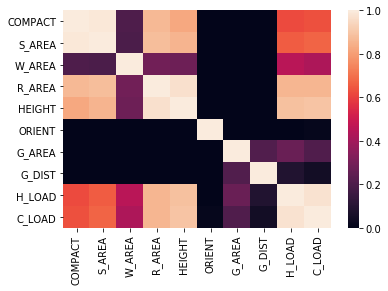

In [5]:
corrMat = WD.corr()
sb.heatmap(abs(corrMat))
print(corrMat)

In [6]:
#features
features = WD.drop(columns=['S_AREA', 'R_AREA', 'H_LOAD', 'C_LOAD'])
    ## -S_AREA, -R_AREA
features = features[:768]

#dependent variable
DVar1 = WD['H_LOAD']
DVar_H = DVar1[:768]
DVar2 = WD['C_LOAD']
DVar_C = DVar2[:768]

In [7]:
WD.groupby(['COMPACT']).count()

,S_AREA,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
COMPACT,,,,,,,,,
0.62,64,64,64,64,64,64,64,64,64
0.64,64,64,64,64,64,64,64,64,64
0.66,64,64,64,64,64,64,64,64,64
0.69,64,64,64,64,64,64,64,64,64
0.71,64,64,64,64,64,64,64,64,64
0.74,64,64,64,64,64,64,64,64,64
0.76,64,64,64,64,64,64,64,64,64
0.79,64,64,64,64,64,64,64,64,64
0.82,64,64,64,64,64,64,64,64,64


In [8]:
WD.groupby(['S_AREA']).count()

,COMPACT,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
S_AREA,,,,,,,,,
514.5,64,64,64,64,64,64,64,64,64
563.5,64,64,64,64,64,64,64,64,64
588.0,64,64,64,64,64,64,64,64,64
612.5,64,64,64,64,64,64,64,64,64
637.0,64,64,64,64,64,64,64,64,64
661.5,64,64,64,64,64,64,64,64,64
686.0,64,64,64,64,64,64,64,64,64
710.5,64,64,64,64,64,64,64,64,64
735.0,64,64,64,64,64,64,64,64,64


In [9]:
WD.groupby(['W_AREA', 'R_AREA']).count()

COMPACT  S_AREA  HEIGHT  ORIENT  G_AREA  G_DIST  H_LOAD  C_LOAD
W_AREA R_AREA                                                                 
245.0  220.50       64      64      64      64      64      64      64      64
269.5  220.50       64      64      64      64      64      64      64      64
294.0  110.25       64      64      64      64      64      64      64      64
       147.00       64      64      64      64      64      64      64      64
       220.50       64      64      64      64      64      64      64      64
318.5  122.50       64      64      64      64      64      64      64      64
       147.00       64      64      64      64      64      64      64      64
       220.50       64      64      64      64      64      64      64      64
343.0  147.00       64      64      64      64      64      64      64      64
       220.50       64      64      64      64      64      64      64      64
367.5  220.50       64      64      64      64      64      64      64      64
416.5  122.50       64      64      64      64      64      64      64      64

In [10]:
WD.groupby(['ORIENT', 'HEIGHT']).count()

COMPACT  S_AREA  W_AREA  R_AREA  G_AREA  G_DIST  H_LOAD  C_LOAD
ORIENT HEIGHT                                                                 
2.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96
3.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96
4.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96
5.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96

In [11]:
WD.groupby(['G_DIST', 'G_AREA']).count()

COMPACT  S_AREA  W_AREA  R_AREA  HEIGHT  ORIENT  H_LOAD  C_LOAD
G_DIST G_AREA                                                                 
0.0    0.00         48      48      48      48      48      48      48      48
1.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
2.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
3.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
4.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
5.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48

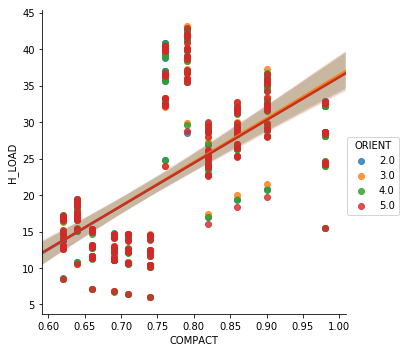

In [12]:
sb.lmplot('COMPACT', 'H_LOAD', data=WD, hue='ORIENT')

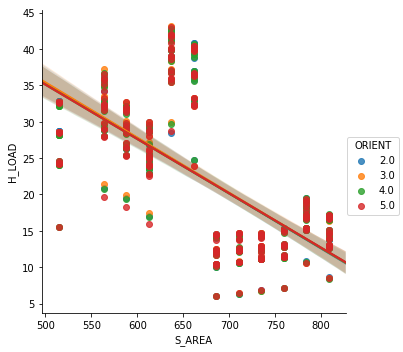

In [13]:
sb.lmplot('S_AREA', 'H_LOAD', data=WD, hue='ORIENT')

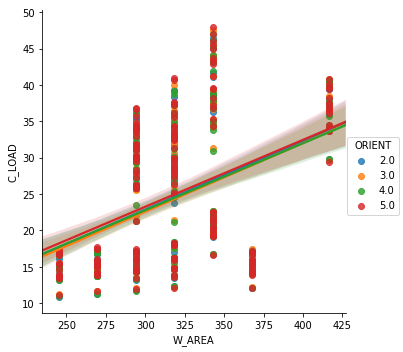

In [14]:
sb.lmplot('W_AREA', 'C_LOAD', data=WD, hue='ORIENT')

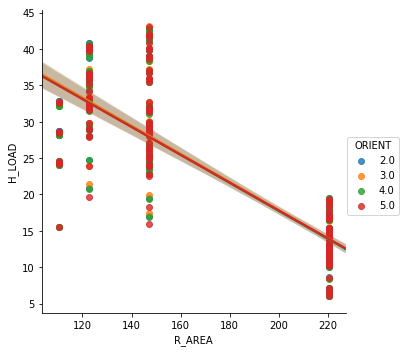

In [15]:
sb.lmplot('R_AREA', 'H_LOAD', data=WD, hue='ORIENT')

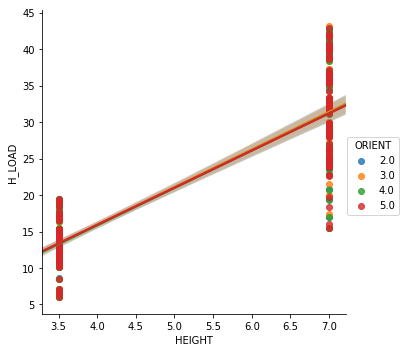

In [16]:
sb.lmplot('HEIGHT', 'H_LOAD', data=WD, hue='ORIENT')

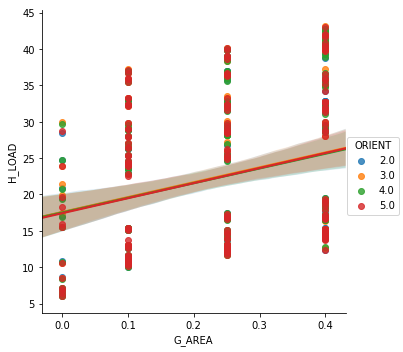

In [17]:
sb.lmplot('G_AREA', 'H_LOAD', data=WD, hue='ORIENT')

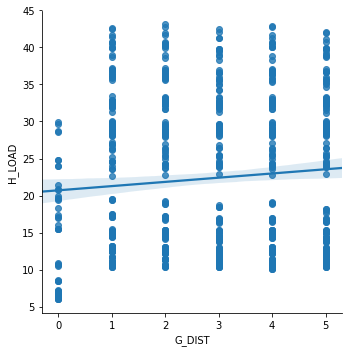

In [18]:
sb.lmplot('G_DIST', 'H_LOAD', data=WD)

In [19]:
#Model Data
x_train, x_test, y_train_H, y_test_H = tts(features, DVar_H, test_size=0.25, random_state=257)

In [20]:
x_train, x_test, y_train_H, y_test_H = tts_cv(x_train, y_train_H)
x_train.shape, x_test.shape

((432, 6), (144, 6))

In [21]:
#Models Heat
modelSVR = SVR()
modelRF_H = RandomForestRegressor()
modelLR = LinearRegression()

In [22]:
#SVR
modelSVR.fit(x_train,y_train_H)
print(cross_val_score(modelSVR, x_train, y_train_H))
modelSVR.score(x_train,y_train_H)

[0.74529286 0.70463755 0.76517625]


0.8558971952905711

In [23]:
#RandomForest
modelRF_H.fit(x_train,y_train_H)
print(cross_val_score(modelRF_H, x_train, y_train_H))
modelRF_H.score(x_train,y_train_H)

[0.99404089 0.99587911 0.99659312]


0.9995623820237602

In [24]:
#LinearRegression
modelLR.fit(x_train,y_train_H)
print(cross_val_score(modelLR, x_train, y_train_H))
modelLR.score(x_train,y_train_H)

[0.90210229 0.91374058 0.88655475]


0.9069140092480094

In [25]:
predictions_H = modelRF_H.predict(x_test)
predRsquared = r2_score(y_test_H, predictions_H)
rmse = sqrt(mean_squared_error(y_test_H, predictions_H))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.995
RMSE: 0.720


In [26]:
rfe = RFE(modelRF_H, 1)
fit = rfe.fit(x_test, y_test_H)

print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 1
Selected Features: [False False  True False False False]
Feature Ranking: [2 4 1 6 3 5]


In [27]:
#Cooling loads

In [28]:
x_train, x_test, y_train_C, y_test_C = tts(features, DVar_C, test_size=0.25, random_state=257)

In [29]:
x_train, x_test, y_train_C, y_test_C = tts_cv(x_train, y_train_C)
x_train.shape, x_test.shape

((432, 6), (144, 6))

In [30]:
predictions_C = modelRF_H.predict(x_test)
predRsquared = r2_score(y_test_C, predictions_C)
rmse = sqrt(mean_squared_error(y_test_C, predictions_C))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.889
RMSE: 2.979


In [31]:
#Models Cool
modelRF_C = RandomForestRegressor(n_estimators = 150, min_samples_leaf = 1)

In [32]:
#RandomForest
modelRF_C.fit(x_train,y_train_C)
print(cross_val_score(modelRF_C, x_train, y_train_C))
modelRF_C.score(x_train,y_train_C)

[0.96024171 0.96202782 0.96968651]


0.9954573117483189

In [33]:
rfe = RFE(modelRF_C, 1)
fit = rfe.fit(x_test, y_test_C)

print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 1
Selected Features: [ True False False False False False]
Feature Ranking: [1 4 2 6 3 5]
